In [1]:
import os
import csv
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
year_list = []
industry_list = []
quarter_list = []
industry_type_list = []
month1_list = []
month2_list = []
month3_list = []
total_wages_list = []

for each_csv_file in glob.glob("*.csv"):
    #print(each_csv_file)
    csvpath = each_csv_file
    with open(csvpath, newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            
            if row[0] == "06075":
                year_list.append(row[5])
                industry_list.append(row[10])
                industry_type_list.append(row[9])
                quarter_list.append(row[6])
                month1_list.append(row[14])
                month2_list.append(row[15])
                month3_list.append(row[16])
                total_wages_list.append(row[17])
                
    csvfile.close()
print("Completed data collection")

collected_data_dict = {"Year": year_list, "Industry": industry_list, "Industry Type": industry_type_list,
                      "Quarter": quarter_list, "Emp Level Month #1": month1_list, "Emp Level Month #2": month2_list, "Emp Level Month #3": month3_list,
                      "Total Wages Collected": total_wages_list}
        
collected_data_df = pd.DataFrame(collected_data_dict)
print("Completed constructing dataframe")

Completed data collection
Completed constructing dataframe


In [3]:
# test_array=[]
# with open("minimum_wage_sched.csv", encoding='utf-8-sig') as csvfile:
#     csvreader = csv.reader(csvfile)
#     for row in csvreader:
#         test_array.append(row[0])
# csvfile.close()

In [22]:
collected_data_df = collected_data_df[['Year', 'Industry', 'Industry Type', 'Quarter', 'Emp Level Month #1',
                                      'Emp Level Month #2', 'Emp Level Month #3', 'Total Wages Collected']]
#collected_data_df.head()

#### Sorting collected_data_df by Year and Industry, then excluding government jobs because state minimum wage generally does not affect government positions

In [23]:
collected_data_df = collected_data_df.sort_values(['Year', 'Industry']).reset_index(drop=True)
collected_data_df_mod = collected_data_df.loc[collected_data_df['Industry Type']=='Private'].reset_index(drop=True)
#collected_data_df_mod.head()

#### Changing column data from 'objects' (type string) to integers (type int)

In [24]:
collected_data_df_mod['Total Wages Collected'] = collected_data_df_mod['Total Wages Collected'].astype("int")
collected_data_df_mod['Emp Level Month #1'] = collected_data_df_mod['Emp Level Month #1'].astype("int")
collected_data_df_mod['Emp Level Month #2'] = collected_data_df_mod['Emp Level Month #2'].astype("int")
collected_data_df_mod['Emp Level Month #3'] = collected_data_df_mod['Emp Level Month #3'].astype("int")


In [25]:
# collected_data_df_mod.dtypes

In [26]:
# collected_data_df_mod['Emp Level Month #1'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #1'])
# collected_data_df_mod['Emp Level Month #2'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #2'])
# collected_data_df_mod['Emp Level Month #3'] = pd.to_numeric(collected_data_df_mod['Emp Level Month #3'])
# collected_data_df_mod['Total Wages Collected'] = pd.to_numeric(collected_data_df_mod['Total Wages Collected'])

#### Grouping the data by Year/Industry and then taking the mean between quarters, since employment levels fluctuate over time, the mean is taken between all quarters and all months (yearly average).

In [27]:
# Averaging column-wise
group_year = collected_data_df_mod.groupby(["Year", "Industry"]).mean()
# group_year.head()

In [28]:
# Averaging row-wise
group_year["Yearly Average Emp"] = (group_year['Emp Level Month #1']+
                                    group_year['Emp Level Month #2']+
                                    group_year['Emp Level Month #3'])/3

In [30]:
group_year = group_year.groupby("Year").sum()
group_year = group_year.rename(columns={"Yearly Average Emp": "Employment Level"})
# group_year.head()

In [12]:
min_wage_df = pd.read_csv('minimum_wage_sched.csv', encoding='utf-8')
# min_wage_df_percentchange = min_wage_df.pct_change()

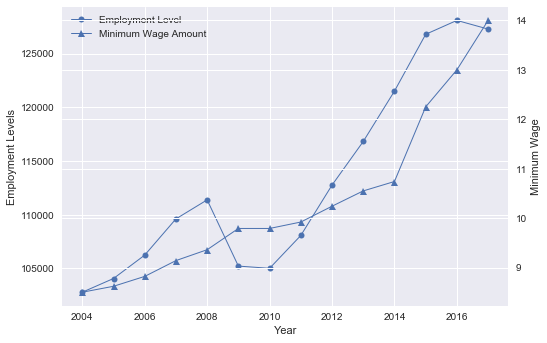

In [57]:
fig, ax1 = plt.subplots(1, sharex=True)
ax2 = ax1.twinx()
ax1.plot(min_wage_df['Year'], group_year['Employment Level'], linewidth=1, marker="o", markersize=6, label="Employment Level")
ax2.plot(min_wage_df.Year, min_wage_df.Min_wage, linewidth=1, marker="^", markersize=7, label="Minimum Wage Amount")
ax1.set_xlabel("Year")
ax1.set_ylabel("Employment Levels")
ax2.set_ylabel("Minimum Wage")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [18]:
percentage_change = group_year.pct_change()
percentage_change_df = percentage_change[["Total Wages Collected", "Employment Level"]].rename(columns={"Total Wages Collected": "Percentage Change (Wages)",
                                                           "Employment Level": "Percentage Change (Emp. Level)"})
percentage_change_df = percentage_change_df.reset_index()

In [19]:
min_wage_df_percentchange = min_wage_df.set_index("Year").pct_change()

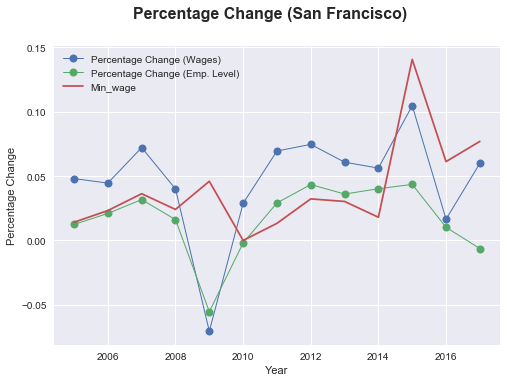

In [20]:
fig, ax1 = plt.subplots(1)
fig.suptitle("Percentage Change (San Francisco)", fontsize=16,
             fontweight="bold")

ax1.plot(percentage_change_df['Year'], percentage_change_df['Percentage Change (Wages)'], linewidth=1, marker="o", markersize=8, label="Percentage Change (Wages)")
ax1.plot(percentage_change_df['Year'], percentage_change_df['Percentage Change (Emp. Level)'], linewidth=1, marker="o", markersize=8, label="Percentage Change (Emp. Level)")
ax1.plot(percentage_change_df['Year'], min_wage_df_percentchange.Min_wage)
ax1.set_ylabel("Percentage Change")
ax1.set_xlabel("Year")
plt.legend()
plt.show()